# Network Analysis

---


## Introduction

Networks are measurable representations of patterns of relationships connecting entities in an abstract or actual space. Networks have been used to model airplane traffic from airports, supply chains, amorphous materials like window glass, cells, and proteins. They can also be used to model relationships among people. Social networks are patterns of relationships among people or organizations that affect and are affected by actions of individuals within the network. Network analysis captures the effect of the complete pattern of conections among individuals in a group to help us perform structural analysis of outcomes of interest for individuals and the group as a whole. 

Networks can be represented as **graphs**, where a graph is made up of **nodes** connected by **ties**. The flexibility of network analysis means that the first step toward analysis is to clearly define what constitutes a node and what constitutes a tie in your network. There are several type of graphs: connected, unconnected, directional, and many more (see [glossary](#glossary-of-terms) for a list of terms). 

This tutorial is based on Chapter 8 of [Big Data and Social Science](https://github.com/BigDataSocialScience). 


[Dataset Link](http://www-personal.umich.edu/~mejn/netdata/)

[Original Publication](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf)

## Glossary of Terms
- A **node** is an individual entity within a graph.

- A **tie** is a link between nodes. Ties can be **undirected**, meaning they represent a symmetrical
relationship, or **directed**, meaning they represent an asymmetrical relationship (one that doesn't necessarily
go both ways). A directed tie is known as an arc. An undirected tie is known as an edge.

- The **degree** of a node is the number of ties that are connected to that node.

- A **directed graph** has directed ties, which depict an asymmetrical relationship. For instance, I may 
follow Barack Obama on Instagram, but that does not necessarily mean that he follows me. 

- An **undirected graph** has ties that depict a symmetrical or reciprocal relationship. For instance, if I am Facebook friends with Barack Obama, then he is also Facebook friends with me.

- A **walk** is a route, or an unbroken chain of relationships, between two nodes. 

- A **trail** between two nodes is a route in which no *tie* is repeated. 

- A **path** between two nodes is a route in which no *node* is repeated. 

- A **cutpoint** is a *node* that cannot be removed without disconnecting the network. 

- A **bridge** is a *tie* that cannot be removed without disconnecting the network. 

- Two nodes are said to be **reachable** when they are connected by an unbroken chain of relationships through
other nodes. 

- **Network density** is the number of *actual* connections divided by the number of *potential* connections. 

- **Average distance** is the average path length between nodes in a graph. It is a measure of how many nodes 
it takes to transmit information across the network. 

- **Centrality** is the degree to which a network revolves around a given node. 

## Table of Contents

1. [Loading the Data](#Loading-the-data)
2. [Representations of Networks](#Representations-of-Networks)
    1. [Adjacency Matrix](#Adjacency-matrix)
    2. [List of Edges](#List-of-edges)
    3. [Graphs](#Graphs)
3. [Network Measures](#network-measures)
   1. [Summary Statistics](#summary-statistics)
   2. [Degree Distribution](#Degree-Distribution)
   3. [Components and Reachability](#Components-and-reachability)
   4. [Path Length](#Path-Length)
6. [Centrality Metrics](#Centrality-metrics)
    1. [Degree Centrality](#Degree-Centrality)
    2. [Closeness Centrality](#Closeness-Centrality)
    3. [Betweenness Centrality](#Betweenness-Centrality)
7. [Community Detection](#Community-Detection)

In [3]:
%pylab inline
from __future__ import print_function
import sys
import community
import networkx as nx
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Loading the Data 

In this tutorial we are going to examine the friendship network of 34 students in a karate class. A political rivalry arose in the class and divided the class into two factions, eventually leading to the club fissuring into two separate karate classes. The club held periodic meetings to vote on policy decisions. When one of the faction heads, individuals 1 and 34, called a meeting, they would communicate the information only to members firmly in their faction, in order to ensure that the majority of members attending the meeting were in their faction, thereby guaranteeing that their policies would pass. Meeting times were not publicly announced, but spread from friend to friend in the social network. In this tutorial we will explore graphical representations of this network, degree metrics, centrality metrics, how to calculate the shortest path between nodes, and community detection. We will be using the NetworkX Python Library developed at Los Alamos National Laboratory (LANL). The nodes represent individuals and the ties represent friendships. The data is stored in [gml format](https://en.wikipedia.org/wiki/Graph_Modelling_Language).

In [6]:
Graph_Karate = nx.read_gml('data/karate.gml', label='id')
Graph_Karate.name = 'SocialCircles_KarateClass'

# Representations of Networks
 

## Adjacency Matrix
One way to represent networks is an **adjacency matrix**, a binary (all entries either 0 or 1) square matrix. Each row represents the connections between one node and the other nodes in the network. For instance, the first row represents the first node. Each entry in a row corresponding to a node represents possible connections to the other nodes as indicated by 1 (connected) or 0 (not connected).  

In [7]:
adj_matrix = nx.adjacency_matrix(Graph_Karate).todense()
np.set_printoptions(threshold=numpy.nan)
print(adj_matrix)

[[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 

Note that in the matrix above, all the diagonal entries are 0. This means that we do not consider a node "connected to itself." 

Is this graph directed? It's hard to tell this - or much else about the network's structure - by looking at this sea of 0s and 1s. Below we demonstrate plotting the adjacency matrix as a heat map, which shows symmetry across the diagonal. This shows that, in the karate class, there are no one-way friendships: if someone is your friend, you are also their friend.

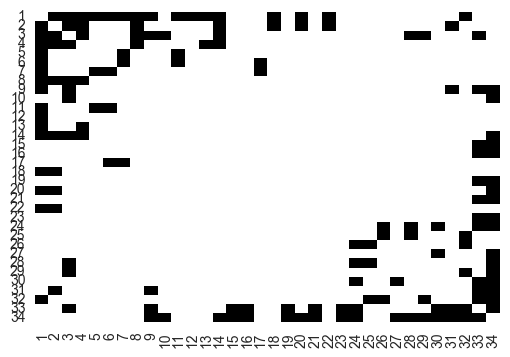

In [8]:
# Plot the adjacency matrix as a heat map
sns.heatmap(adj_matrix,
            cbar=False,
            cmap = plt.get_cmap('Greys'),
            yticklabels=Graph_Karate.nodes(),
            xticklabels=Graph_Karate.nodes(),
            fmt='d')

## List of Edges
Graphs can also be represented as **edge lists**, where you list the connections between nodes exhaustively. If we know the graph is undirected, we only need to list each relationship one time. For example, we say that 1 is connected to 32, but it would be redundant to also say that 32 is connected to 1. 

In [9]:
# Writing the karate class graph as a list of edges
nx.write_edgelist(Graph_Karate,
                 sys.stdout)

1 32 {}
1 2 {}
1 3 {}
1 4 {}
1 5 {}
1 6 {}
1 7 {}
1 8 {}
1 9 {}
1 11 {}
1 12 {}
1 13 {}
1 14 {}
1 18 {}
1 20 {}
1 22 {}
2 3 {}
2 4 {}
2 8 {}
2 14 {}
2 18 {}
2 20 {}
2 22 {}
2 31 {}
3 4 {}
3 33 {}
3 8 {}
3 9 {}
3 10 {}
3 14 {}
3 28 {}
3 29 {}
4 8 {}
4 13 {}
4 14 {}
5 11 {}
5 7 {}
6 11 {}
6 17 {}
6 7 {}
7 17 {}
9 34 {}
9 33 {}
9 31 {}
10 34 {}
14 34 {}
15 33 {}
15 34 {}
16 33 {}
16 34 {}
19 33 {}
19 34 {}
20 34 {}
21 33 {}
21 34 {}
23 33 {}
23 34 {}
24 33 {}
24 26 {}
24 28 {}
24 34 {}
24 30 {}
25 32 {}
25 26 {}
25 28 {}
26 32 {}
27 34 {}
27 30 {}
28 34 {}
29 32 {}
29 34 {}
30 33 {}
30 34 {}
31 34 {}
31 33 {}
32 34 {}
32 33 {}
33 34 {}


## Graphs
Networks can also be displayed as graphs, which is probably the most intuitive way to visualize them. The top visualization below emphasizes the nodes, or individuals, how close they are to one another, and the groups that emerge. 

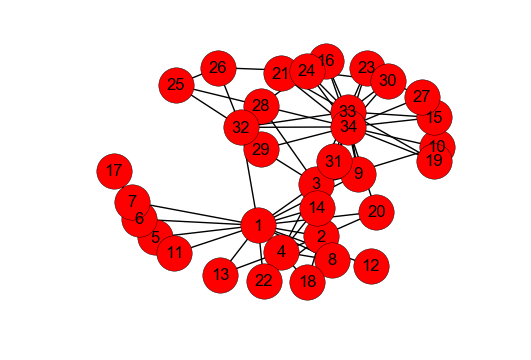

In [11]:
# Displaying the karate class as a graph
spring_pos = nx.spring_layout(Graph_Karate)
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                pos=spring_pos,
                with_labels = True,
                node_size=650,
                label='Friendship Network')

The visualization below emphasizes the edges, or the connections themselves.

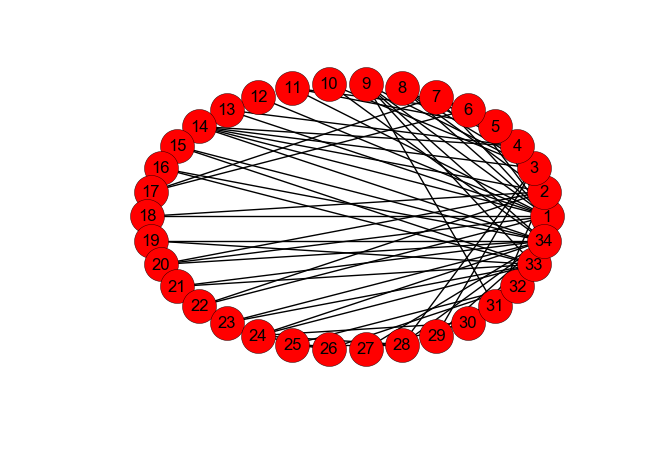

In [12]:
# Displaying the class as a circle
nx.draw_circular(Graph_Karate, 
                 with_labels=True,
                node_size=600)

# Network Measures

It is useful to know the size (in terms of nodes and ties) of the network, both to have an idea of the size and connectivity of the network, and because most of the measures you will use to describe the network will need
to be standardized by the number of nodes or the number of potential connections. 

The most important thing to understand about larger networks is the pattern of indirect connections among nodes, because it is these chains of indirect connections that make the network function as a whole, and make networks a 
useful level of analysis. Much of the power of networks is due to indirect ties that create **reachability.** Two nodes can reach each other if they are conncted by an unbroken chain of relationships, often called **indirect ties**.

Structural differences between node positions, the presence and characteristics of smaller "communities" within larger networks, and properties of the structure of the whole group can be quantified using different **network measures.**

## Summary Statistics 

In [13]:
# Print out some summary statistics on the network
print( nx.info(Graph_Karate) )

Name: SocialCircles_KarateClass
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


We see that there are 34 edges (students) and 78 edges (friendship). 

The **average degree** of the network is the average number of edges connected to each node. This is not the same as 78/34, because each "friendship" includes two nodes, but is only counted once in the total number of edges. 

We see that the average degree of this network is 4.5882, meaning that the average individual in the network
has about 4.6 friends.  

In [14]:
# Print out the average density of the network
print(nx.density(Graph_Karate))

0.139037433155


The average density is calculated as the $$\text{average density} = \frac{\text{actual ties}}{\text{possible number of ties}} $$

where the possible number of ties for an undirected graph (if every node had a tie to every other node) is $\frac{n(n-1)}{2}$. 

If every node were connected to every other node, the average density would be 1. If there were no ties between any of the nodes, the average density would be 0. The average density of this network is 0.14, which indicates it is  not a very dense network. In this example, we can interpret this to mean that individuals are mostly friends only with
others that belong to the same faction - there is not much interaction or overlap between the two factions.

## Degree Distribution 

**Q: Who has the most friends?**

We can cast this question as a network analysis problem by asking *which node has the most edges*. 

In [15]:
dict_degree = Graph_Karate.degree()
df_degree = pd.DataFrame.from_dict(dict_degree, orient='index')
df_degree.columns=['degree']
df_degree.index.name = 'node_id'

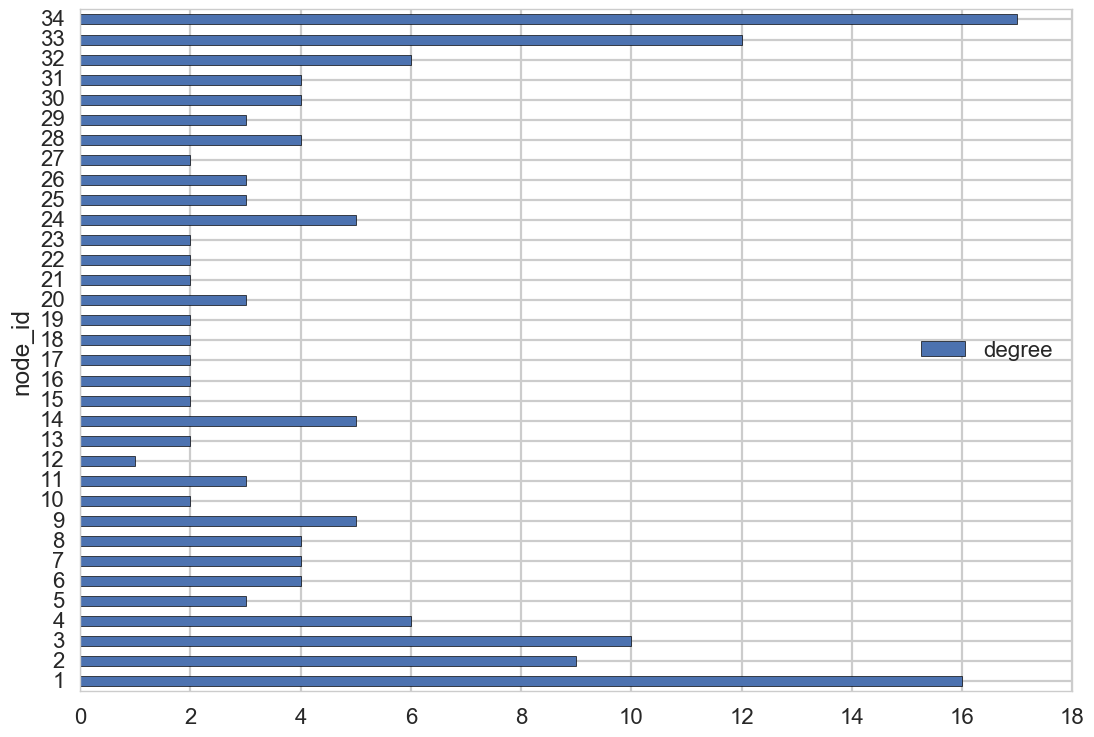

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(22, 12))
sns.set_context("poster", font_scale=1.00, rc={"lines.linewidth": 1.00,"lines.markersize":8})
df_degree.plot(kind='barh')

From this figure we can see that nodes 1, 34, and 33 are the **most connected**, meaning they have the most friendships out of the group. 12 is the only individual that has only one connection. There are a few individuals who have 10 friends, and the rest in the class have around 2 to 5 friendships. It makes sense that 1 and 34 have the most social connections, because they are the leaders of the rival factions. 

## Components and Reachability

Two nodes are said to be **reachable** when they are connected by an unbroken chain of relationships through other nodes. Networks in which more of the possible connections (direct and indirect) among nodes are realized are denser and more cohesive than networks in which fewer of these connections are realized.

The reachability of individuals in a netowrk is determined by membership in **components**, which are subsets of the 
larger network in which every member of the group is indirectly connected to every other. Imagining the standard node and line drawing of a graph, a component is a portion of the network where you can trace a path between every pair of nodes without ever lifting your pen. 

Many larger networks consist of a single dominant component including anywhere from 50% to 90% of the individuals, and a few smaller components that are not connected. In this case, is common to perform analysis on only the main connected component of the graph, because there is not a convenient way to mathematically represent how "far away" unconnected nodes are. In our karate class example, our graph is connected, meaning that you can reach any individual from any other individual by moving along the edges of the graph, so we don't need to worry about that problem.



## Path Length

A **shortest path** between two nodes is a path from one node to the other, not repeating any nodes. One way to think of a shortest path between two individuals is how many people it would take to broker an introduction between them (think [six degrees of Kevin Bacon](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon)).

Most pairs will have several shortest paths between them; the *longest shortest path* is called the **geodesic**. 

In [17]:
# Calculate the length of the shortest path between 12 and 15
ls_path = nx.shortest_path(Graph_Karate, 12,15)
print('The path length from {} to {} is {}.'.format(
                                            12,15,len(ls_path)))
print('path length: ', ls_path)

The path length from 12 to 15 is 5.
path length:  [12, 1, 32, 33, 15]


The **average shortest path length** describes how quickly information or goods can disburse through the network.

The average shortest length $l$ is defined as $$ l = \frac{1}{n(n-1)} \sum_{i \ne j}d(v_{i},v_{j}) $$ where $n$ is the number of nodes in the graph and $d(v_{i},v_{j})$ is the shortest path length between nodes $i$ and $j$. 

In [18]:
print(nx.average_shortest_path_length(Graph_Karate))

2.40819964349


The average shortest path in this network is 2.5 nodes, which implies information can be transferred between on any two nodes on average between 2.5 people. The shorter the average shortest path is, the more quickly information or goods can dispel throughout the network, as in the case of a contagious disease spreading in an area with a highly concentrated population. A longer average shortest path would indicate slower transfer.  

# Centrality Metrics

Centrality metrics measure how important, or "central," a node is to the network. These can indicate what individual has the most social contacts, who is closest to people, or the person where information most transfers through. There are many **centrality metrics** -- degree centrality, betweenness centrality, closeness centrality, eigenvalue centrality, percolation centrality, PageRank -- all capturing different aspects of a node's contribution to a network. 

Centrality measures are the most commonly used means to explore network effects at the level of certain individual participants. Typically, these metrics identify and describe a few import nodes, but don't tell us much about the rest of the nodes in the network. This is akin to Google's search results: the first few matches are the most relevant, but if you go a few pages in to the search results, you might as well have been searching for something else entirely.

## Degree Centrality

The most basic and intuitive measure of centrality, **degree centrality**, simply counts the number of ties that each node has. Degree centrality represents a clear measure of the prominence or visibility of a node. The degree centrality $C_{D}(x)$ of a node $x$ is

$$C_{D}(x) = \frac{deg(x)}{n-1}$$

where $deg(x)$ is the number of connections that node $x$ has, and $n-1$ is a normalization factor for the total amount of possible connections. 

In the case of the karate class, the node with the highest degree centrality is the person with the most friends.

In [13]:
dict_degree_centrality = nx.degree_centrality(Graph_Karate)
df_degree_centrality = pd.DataFrame.from_dict(dict_degree_centrality, orient='index')
df_degree_centrality.columns=['degree_centrality']
df_degree_centrality.index.name = 'node_id'

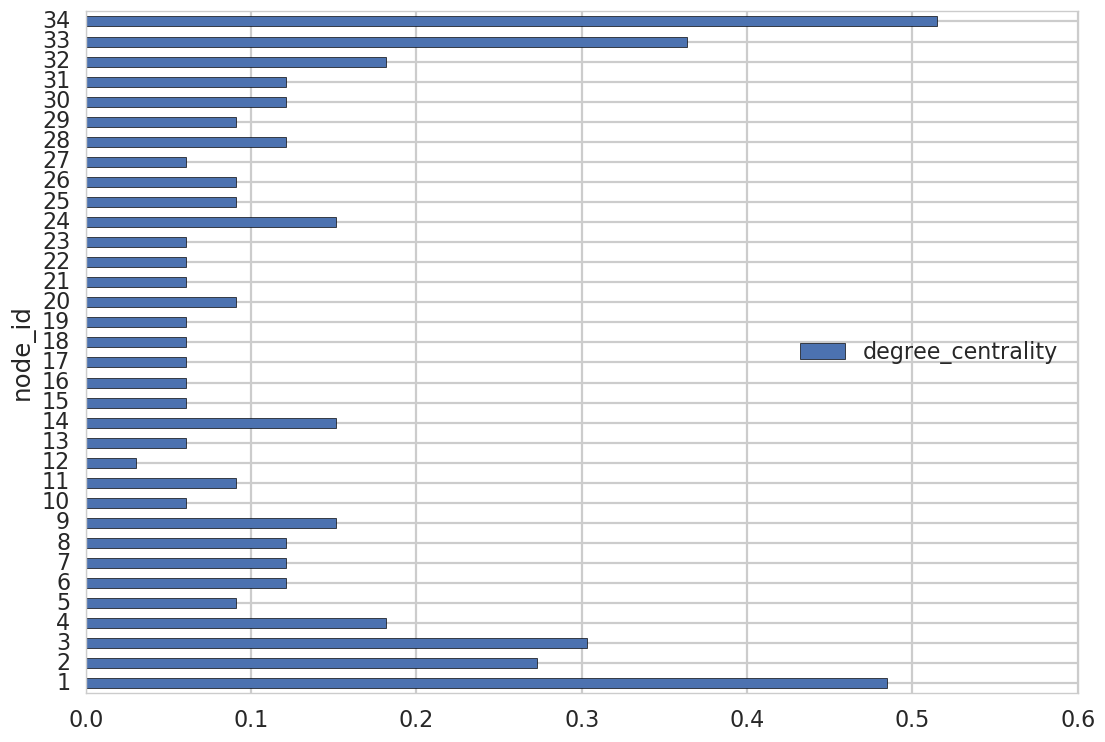

In [14]:
df_degree_centrality.plot(kind='barh')

As we can see this is a recasting of the [degree distribution](#degree-distribution): individuals 1 and 34 have the largest degree centralities and have the most friendships.

## Closeness Centrality

**Closeness centrality** is based on the idea that networks position some individuals closer to or farther away 
from other individuals, and that shorter paths between actors increase the likelihood of communication and 
consequently the abiltiy to coordinate complicated activities. The closeness centrality $C_C(x)$ of a node $x$ is calculated as:

$$C_C(x) = \frac{1}{\sum_{y}d(x,y)} $$

where $d(x,y)$ is the length of the geodesic between nodes $x$ and $y$.

In [20]:
dict_closeness_centrality = nx.closeness_centrality(Graph_Karate)
df_closeness_centrality = pd.DataFrame.from_dict(dict_closeness_centrality,
                                                 orient='index')
df_closeness_centrality.columns=['closeness_centrality']
df_closeness_centrality.index.name = 'node_id'

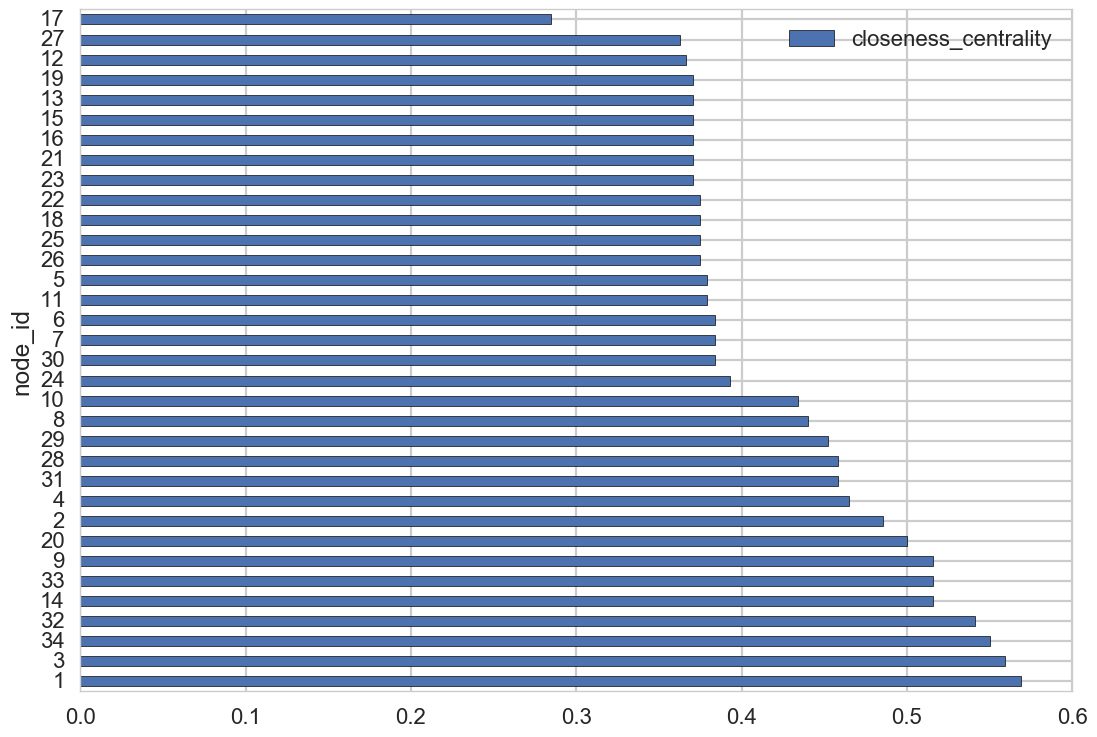

In [21]:
df_closeness_centrality.sort_values(by='closeness_centrality',
                                   ascending=False).plot(kind='barh')

From this distribution 32, 34, 3 and 1 have the highest centrality closeness. This implies that these individuals have the shortest paths to all other members in the network. 

## Betweenness Centrality

Where closeness assumes that communication and information flow increase with proximity, **betweenness centrality**
captures the idea of "brokerage," or that there is an individual benefit which a node derives from being positioned 
"in between" many other pairs of nodes. To calculate betweenness, we must assume that when people search for new
information through networks, they are capable of identifying the shortest path; additionally, we must assume
that when multiple shortest paths exist, each path is equally likely to be chosen.

The betweenness centrality $C_B(x)$ of a node $x$ is given by 

$$ C_B{x} = \sum_{s,t} \frac{\sigma_{st}(x)}{\sigma_{st}}$$ 

where $\sigma_{st}$ is the number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(x)$ is the number of shortest paths $\sigma_{st}$ passing through node $x$. 


In [17]:
dict_betweenness_centrality = nx.betweenness_centrality(Graph_Karate)
df_betweenness_centrality = pd.DataFrame.from_dict(dict_betweenness_centrality,
                                                 orient='index')
df_betweenness_centrality.columns=['betweeness_centrality']
df_betweenness_centrality.index.name = 'node_id'

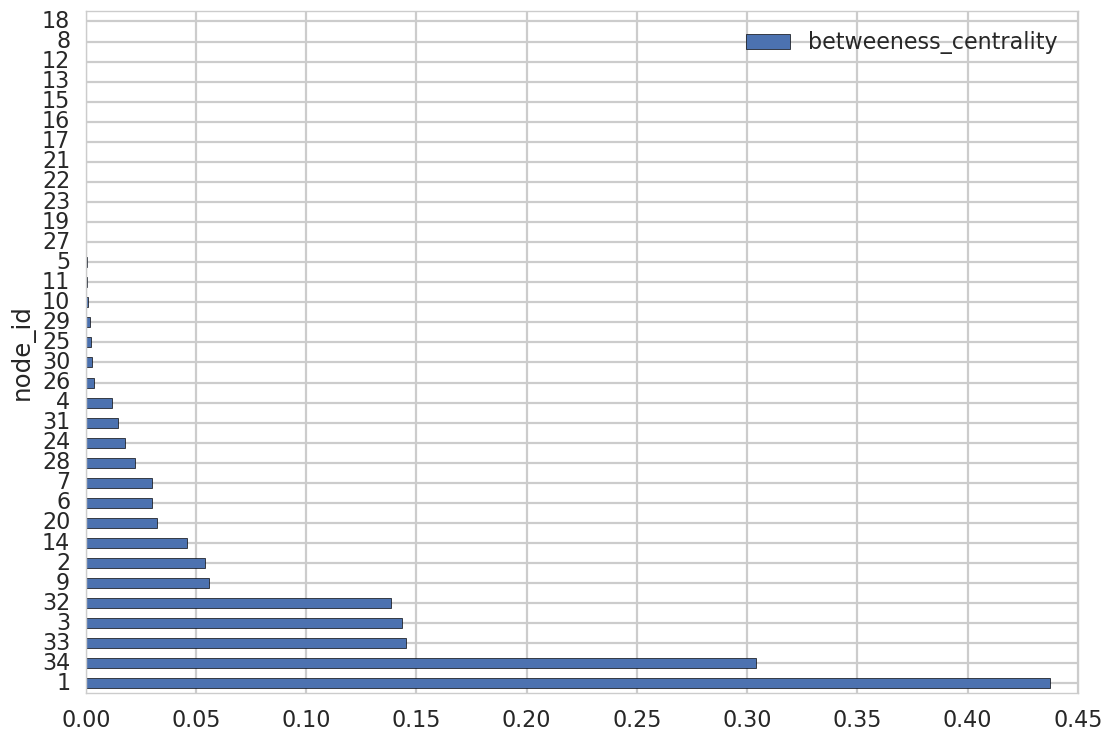

In [18]:
df_betweenness_centrality.sort_values(by='betweeness_centrality',
                                   ascending=False).plot(kind='barh')

The people with the highest betwenness centrality are 34 and 1. This is what we would expect given their high connectivity. 

# Community Detection 

In **community detection**, we try to find sub-networks, or communities, of densely populated connections. Community detection is similiar to clustering, in that strong communities will display an abundance of intra-community connections and few inter-community connections. 

In the case of the karate class, we know beforehand that there are two communities which kept mostly to themselves
and didn't cross-pollinate much. Assuming we *didn't* know that, let's see if we can identify these two communities from looking at the data.

The technical implementation of the algorithm can be found [here](https://arxiv.org/pdf/0803.0476v2.pdf).  

1's Faction: [1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22]

34's Faction: [9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34]

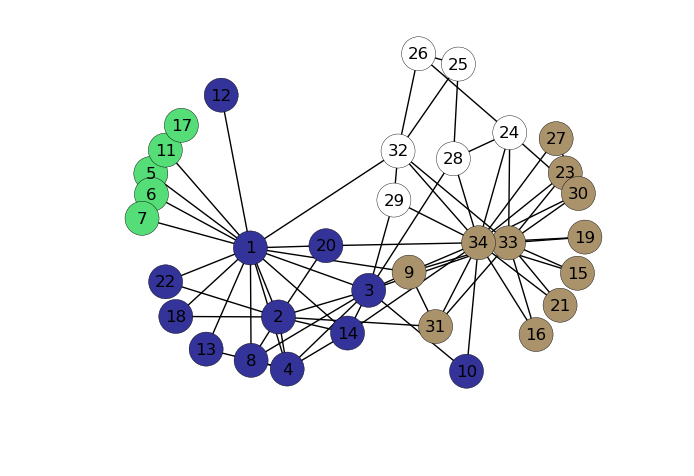

In [18]:
dict_clusters = community.best_partition(Graph_Karate,resolution=1.0)
clusters = [dict_clusters.get(node) for node in Graph_Karate.nodes()]
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                 pos = spring_pos,
                 cmap = plt.get_cmap("terrain"),
                 node_color = clusters, 
                 node_size = 600,
                 with_labels = True,
                 fontsize=200)

Here we've encountered a common problem in clustering: it can be hard to decide on *how many* clusters there are,
as well as the clusters themselves. Often deciding on the number of clusters is done in an ad hoc way. 

We've identified four different sub-clusters within the network, but it's not that evident from the graphic 
that the green cluster or white cluster deserve to be their own separate entity. Here it seems reasonable to combine
the green and navy blue clusters into one faction, and the tan and white clusters into another faction. 

Let's combine the four sub-clusters into two sub-clusters and see how we do. 

In [14]:
make_new_clust = lambda x: 0 if x < 2 else 1
dict_new_clust = {key: make_new_clust(dict_clusters[key]) for key in dict_clusters}

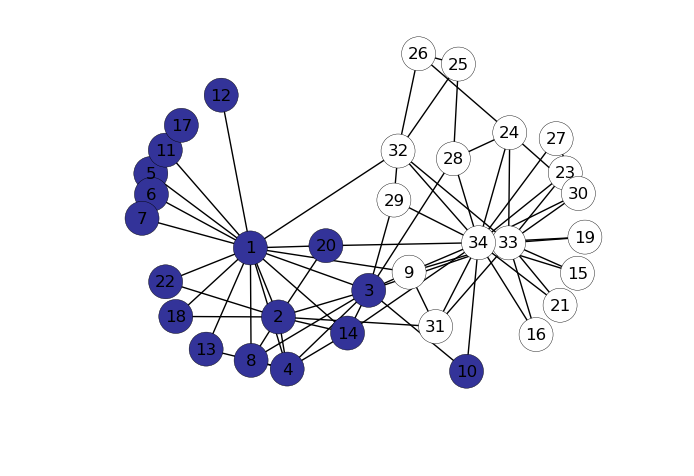

In [19]:
ls_new_clust = [dict_new_clust.get(node) for node in Graph_Karate.nodes()]
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                 pos = spring_pos,
                 cmap=plt.get_cmap("terrain"),
                 node_color = ls_new_clust, 
                 node_size = 600,
                 with_labels = True,
                 fontsize=200)

Looking at the alliances identified in the [original paper](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf), 
we see that we can properly identify which individuals are allied with 1 and with 34, respectively, with the e
xception of 10. Looking at the visualization, it's easy to see why this would be a hard individual to classify: 10
seems to be a case that had close social ties to both 1 and 34.  

[Back to Table of Contents](#Table-of-Contents)